<a href="https://colab.research.google.com/github/tara-shukla/nyt-connections/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data gather + clean

In [1]:
!wget -O nyt.csv "https://drive.google.com/uc?export=download&id=1HxVFZQP-Hnq_w7dsMd1y0CzzlZb4ZXiU"

--2024-06-24 21:36:04--  https://drive.google.com/uc?export=download&id=1HxVFZQP-Hnq_w7dsMd1y0CzzlZb4ZXiU
Resolving drive.google.com (drive.google.com)... 173.194.215.138, 173.194.215.139, 173.194.215.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1HxVFZQP-Hnq_w7dsMd1y0CzzlZb4ZXiU&export=download [following]
--2024-06-24 21:36:04--  https://drive.usercontent.google.com/download?id=1HxVFZQP-Hnq_w7dsMd1y0CzzlZb4ZXiU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70678 (69K) [application/octet-stream]
Saving to: ‘nyt.csv’

nyt.csv             100%[===================>]  69.02K  --.-KB/s    in

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('nyt.csv')
data.head()

,purple_titles,purple_words,blue_titles,blue_words,green_titles,green_words,yellow_titles,yellow_words
0,PALINDROMES,"KAYAK, LEVEL, MOM, RACE CAR",KEYBOARD KEYS,"OPTION, RETURN, SHIFT, TAB",NBA TEAMS,"BUCKS, HEAT, JAZZ, NETS",WET WEATHER,"HAIL, RAIN, SLEET, SNOW"
1,LETTER HOMOPHONES,"ARE, QUEUE, SEA, WHY",MAGAZINES,"ESSENCE, PEOPLE, TIME, US",UNITS OF LENGTH,"FOOT, LEAGUE, MILE, YARD",FOOTWEAR,"BOOT, LOAFER, PUMP, SNEAKER"
2,MEMBERS OF A TRIO,"AMIGO, KING, STOOGE, TENOR","DOG BREEDS, INFORMALLY","LAB, PEKE, PIT, POM",SYNONYMS FOR EAT,"CHOW, GOBBLE, SCARF, WOLF",FACIAL FEATURES,"CHEEK, EYE, MOUTH, NOSE"
3,___ MAN SUPERHEROES,"BAT, IRON, SPIDER, SUPER",CLEANING VERBS,"DUST, MOP, SWEEP, VACUUM","MUSICALS BEGINNING WITH ""C""","CABARET, CAROUSEL, CATS, CHICAGO",SNEAKER BRANDS,"ADIDAS, NIKE, PUMA, REEBOK"
4,CLUE CHARACTERS,"GREEN, MUSTARD, PLUM, SCARLET",SYNONYMS FOR SAD,"BLUE, DOWN, GLUM, LOW",CONDIMENTS,"KETCHUP, MAYO, RELISH, TARTAR",STREAMING SERVICES,"HULU, NETFLIX, PEACOCK, PRIME"


In [4]:
word_cols = ["purple_words", "blue_words", "green_words", "yellow_words"]

def get_all_words(colname):
  for group in data[colname]:
    for word in group.split(','):
      yield word.strip()
purple_all = list(get_all_words("purple_words"))
yellow_all = list(get_all_words("yellow_words"))
green_all = list(get_all_words("green_words"))
blue_all = list(get_all_words("blue_words"))


all_words = purple_all + yellow_all + green_all + blue_all


In [5]:

str_groups = pd.DataFrame(data[word_cols])
def process_groups(col):
    return col.apply(lambda x: x.split(','))

all_groups = str_groups.apply(process_groups, axis=0)
all_groups.head()

,purple_words,blue_words,green_words,yellow_words
0,"[ KAYAK, LEVEL, MOM, RACE CAR]","[ OPTION, RETURN, SHIFT, TAB]","[ BUCKS, HEAT, JAZZ, NETS]","[ HAIL, RAIN, SLEET, SNOW]"
1,"[ ARE, QUEUE, SEA, WHY]","[ ESSENCE, PEOPLE, TIME, US]","[ FOOT, LEAGUE, MILE, YARD]","[ BOOT, LOAFER, PUMP, SNEAKER]"
2,"[ AMIGO, KING, STOOGE, TENOR]","[ LAB, PEKE, PIT, POM]","[ CHOW, GOBBLE, SCARF, WOLF]","[ CHEEK, EYE, MOUTH, NOSE]"
3,"[ BAT, IRON, SPIDER, SUPER]","[ DUST, MOP, SWEEP, VACUUM]","[ CABARET, CAROUSEL, CATS, CHICAGO]","[ ADIDAS, NIKE, PUMA, REEBOK]"
4,"[ GREEN, MUSTARD, PLUM, SCARLET]","[ BLUE, DOWN, GLUM, LOW]","[ KETCHUP, MAYO, RELISH, TARTAR]","[ HULU, NETFLIX, PEACOCK, PRIME]"


In [6]:
'''
from sklearn.model_selection import train_test_split

all = all_groups["purple_words"]+all_groups["yellow_words"]+all_groups["green_words"]+all_groups["blue_words"]
df = pd.DataFrame(all, columns=["connection"])
df.head()
train, test = train_test_split(df, test_size=0.2)
train.head()
'''

'\nfrom sklearn.model_selection import train_test_split\n\nall = all_groups["purple_words"]+all_groups["yellow_words"]+all_groups["green_words"]+all_groups["blue_words"]\ndf = pd.DataFrame(all, columns=["connection"])\ndf.head()\ntrain, test = train_test_split(df, test_size=0.2)\ntrain.head()\n'

In [7]:
all = list(str_groups["purple_words"])
all.append(list(str_groups["yellow_words"]))
all.append(list(str_groups["green_words"]))
all.append(list(str_groups["blue_words"]))

all[0:5]

[' KAYAK, LEVEL, MOM, RACE CAR',
 ' ARE, QUEUE, SEA, WHY',
 ' AMIGO, KING, STOOGE, TENOR',
 ' BAT, IRON, SPIDER, SUPER',
 ' GREEN, MUSTARD, PLUM, SCARLET']

# Scraping for definitions

In [8]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd

def get_webster_definitions(word):
  url = "https://www.merriam-webster.com/dictionary/" + word
  webpage = requests.get(url)
  word_soup = BeautifulSoup(webpage.text, "html.parser")

  definitions = word_soup.find_all('span', class_='dt')
  sentences = []

  for definition in definitions:
    this_sent = word
    # Extract definition text
    definition_text = definition.find('span', class_='dtText').get_text()
    this_sent+= definition_text


    # Extract associated example sentences
    example_sentences = definition.find_all('span', class_='ex-sent')
    for sentence in example_sentences:
        sentence_text = sentence.get_text()
        this_sent+= " "
        this_sent+=sentence_text
    sentences.append(this_sent)

  return sentences

def scrape_headings(word_soup):
  html_headings = word_soup.find_all('span','mw-headline')
  headings = []
  for heading in html_headings:
    headings.append(heading.get_text())
  if "Other uses" in headings:
    headings.remove("Other uses")
  return headings[:-1]

def wiki_page_exists(word_soup, url):
  no_page_exists = word_soup.find('div', 'no-article-text-sister-projects')
  if no_page_exists:
    return False
  else:
    return True


def get_wiki_themes(word):
  url = "https://en.wikipedia.org/wiki/" + word + "_(disambiguation)"
  webpage = requests.get(url)
  word_soup = BeautifulSoup(webpage.text, "html.parser")

  if not word_soup.find('div', 'no-article-text-sister-projects'):
    return scrape_headings(word_soup)
  else:
    return ["not a polysemic word probably! :) "]


In [9]:
!pip install levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 853.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.3 MB/s eta 0:00:00


In [10]:
import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
random_seed = 36
random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    with torch.no_grad():
      outputs = model(**inputs)
      #outputs = model(input_ids, attention_mask=attention_mask)
      # The embeddings are in the last_hidden_state tensor
      # We use the [CLS] token representation as a sentence embedding, but for individual words, we use the actual tokens.
      embeddings = outputs.last_hidden_state
      word_embeddings = embeddings[0, 1:1+len(text)]

    # Convert the embeddings to numpy arrays
    word_embeddings = np.array(word_embeddings)
    #word_embeddings.reshape(1, -1)
    return word_embeddings

In [14]:
def get_similarity(text1, text2):
    embedding_1 = get_embedding(text1)
    embedding_2 = get_embedding(text2)
    similarity_score = cosine_similarity(embedding_1, embedding_2)
    return similarity_score[0][0]

In [15]:
get_similarity("bacon", "lettuce")

0.37073082

In [16]:
from Levenshtein import distance, jaro, ratio

distance("mutter", "mother")
jaro("mutter", "mother")


0.7777777777777777

In [17]:
green_groups = list(all_groups["green_words"])
green_context_scores = []

#use sum of cosine differences as group mutual similarity?
green_groups[4]

for word in green_groups[4]:
  this_sim = 0
  for other_word in green_groups[4]:
    if other_word != word:
      this_sim += get_similarity(word, other_word)
  green_context_scores.append(this_sim/3)

green_context_scores

[0.4304671064019203,
 0.1315879449248314,
 0.4286969155073166,
 0.4545772274335225]

#Word Embeddings and Clustering

In [18]:
import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [126]:
model = BertModel.from_pretrained('bert-base-uncased',
           output_hidden_states = True,)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', output_hidden_states = True)

In [127]:
def process_text(sentence):
  process_text = "[CLS]"+sentence+"[SEP]"
  tokenized = tokenizer.tokenize(process_text)
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized)
  segments_ids = [1] * len(indexed_tokens)

  tokenized_tensor = torch.tensor([indexed_tokens])
  segments_tensor = torch.tensor([segments_ids])

  return tokenized, tokenized_tensor, segments_tensor
  #https://medium.com/@r3d_robot/getting-contextualized-word-embeddings-with-bert-20798d8b43a4

In [128]:
def get_embeddings(tokenized_tensor, segments_tensor):
  with torch.no_grad():
    outputs = model(tokenized_tensor, segments_tensor)
    hidden_states = outputs[2]

  token_embeddings = torch.stack(hidden_states, dim=0)
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  token_embeddings = token_embeddings.permute(1,0,2)

  token_vecs_sum = []

  for token in token_embeddings:
    sum_vec = torch.sum(token[-4:], dim=0)
    token_vecs_sum.append(sum_vec)

  return token_vecs_sum

In [ ]:
from collections import OrderedDict


word = "run"
defs = get_webster_definitions(word)
print(defs)

embeddings = []
context_tokens = []

for sentence in defs:
  tokenized, tokenized_tensor, segments_tensor = process_text(sentence)
  list_token = get_embeddings(tokenized_tensor, segments_tensor)

  tokens = OrderedDict()

  for token in tokenized:
    if token in tokens:
      tokens[token] += 1
    else:
      tokens[token] = 1

  token_indices = [i for i, t in enumerate(tokenized) if t == token]
  current_index = token_indices[tokens[token]-1]
  token_vec = list_token[current_index]

  context_tokens.append(token)
  embeddings.append(token_vec)
embeddings


['run: to go faster than a walk', 'run: to move at a fast gallop', 'run: flee, retreat, escape dropped the gun and ran', 'run: to utilize a running play on offense', 'run: to go without restraint : move freely about at will let chickens run loose', 'run: to keep company : consort a ram running with ewes ran with a wild crowd when he was young', 'run: to sail before the wind in distinction from reaching or sailing close-hauled', 'run: roam, rove running about with no overcoat', 'run: to go rapidly or hurriedly : hasten run and fetch the doctor', 'run: to go in urgency or distress : resort runs to mother at every little difficulty', 'run: to make a quick, easy, or casual trip or visit ran over to borrow some sugar', 'run: to contend in a race', 'run: to enter into an election contest will run for mayor', 'run: to move on or as if on wheels : glide file drawers running on ball bearings', 'run: to roll forward rapidly or freely', 'run: to pass or slide freely a rope runs through the pulley

In [113]:
len(defs)

4

In [114]:
import torch.nn as nn
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
output = cos(embeddings[1], embeddings[5])
output

IndexError: list index out of range

In [149]:
embeddings_processed = [tensor.tolist() for tensor in embeddings]
embeddings_processed = np.array(embeddings_processed)
embeddings_processed

array([[ 0.82783306, -0.03015236, -0.52172005, ...,  0.4238207 ,
        -0.8174901 , -0.42852938],
       [ 0.79211241, -0.04559572, -0.58946568, ...,  0.25792098,
        -0.94746935, -0.29235476],
       [ 0.54638493,  0.23797645, -0.4345327 , ...,  0.08030243,
        -0.74646032, -0.16596425],
       ...,
       [ 0.92259103,  0.24522135, -0.44272873, ...,  0.16146983,
        -0.60628986, -0.25677866],
       [ 0.46732342,  0.00456187, -0.37500992, ...,  0.32181671,
        -0.71014667, -0.15994753],
       [ 0.86262411,  0.13542353, -0.00756246, ...,  0.16150162,
        -0.740641  , -0.32082024]])

(221, 768)
(221, 768)
221
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 1 2 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0
 0 0 0 2 0 0 0 2 2 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 0 2 0 0 2 0 2 0 1 0 0 0 2 2 0 2 0 2 0 0 2 1 2 2 0 2 0 0 1 2 0 2 2 0 2
 2 0 3 1 0 0 0 1 0 0 0 1 2 1 1 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 2 2 0 0 2 3 0
 0 0 0 1 0 0 0 1 1 0 2 1 2 0 1 0 2 2 2 1 0 2 2 2 2 2 2 2 2 0 2 2 3 1 0 2 2
 2 2 0 2 2 0 3 2 2 0 0 2 3 1 0 0 0 0 2 2 2 0 0 0 2 2 2 1 2 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 0 0 0 1 0 0 0 2 0 0 0 2 0 0 2 2 0 1 2 2 2 0 0 3 2 2 2 0 0 1 2 2 2]
[2 2 0 2 0 0 2 0 0 0 1 4 0 4 4 2 4 2 0 4 0 4 2 1 2 2 0 4 4 4 1 4 4 2 4 4 4
 2 0 3 1 0 0 0 1 0 0 0 1 2 1 1 2 1 2 0 0 0 0 0 4 4 0 0 0 1 4 2 0 0 4 4 3 4
 4 0 4 1 0 0 0 1 1 0 2 1 2 0 1 0 4 2 2 1 0 2 2 2 2 2 2 2 2 0 2 2 3 1 4 2 2
 2 2 0 2 2 4 3 2 2 0 0 2 3 1 4 0 4 0 2 2 2 0 0 0 2 4 2 1 2 4 0 0 4 4 0 4 0
 4 2 2 0 4 4 4 4 4 4 0 0 0 0 0 2 2 0 0 0 0 4 2 2 4 4 0 0 4 4 0 4 4 4 0 4 4
 4 0 4 0 0 0 1 0 4 0 2 0 0 0 4 4 0 4 2 0 1 4 2 2 0 0 3 2 2 2 0 0 1 4 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 5 0 5 0 0 5 0 0 0 1 4 0 4 5 5 4 5 0 5 0 4 2 1 5 5 0 5 4 4 1 4 5 5 5 4 5
 5 0 3 1 5 0 0 1 0 0 0 1 5 1 1 5 1 5 0 0 0 0 0 4 4 0 0 0 1 4 2 0 0 4 4 3 4
 4 0 4 1 0 2 0 1 1 0 5 1 5 0 1 0 5 2 5 1 0 5 5 5 5 2 5 5 5 0 5 5 3 1 4 2 2
 5 5 0 5 5 4 3 5 5 0 0 2 3 1 4 0 4 4 5 5 5 0 0 4 5 5 2 1 5 4 0 0 4 4 0 4 0
 4 5 5 0 4 4 4 4 5 4 0 0 0 0 0 2 5 0 0 0 0 4 5 5 5 4 0 0 4 4 5 5 4 4 0 4 4
 5 0 5 0 0 5 1 0 4 0 2 0 5 0 5 4 0 5 5 0 1 4 5 5 0 0 3 5 2 5 0 0 1 5 5 2]
[1 1 5 1 3 3 0 3 5 3 6 3 3 3 1 1 3 1 3 1 3 4 5 6 1 1 3 1 3 4 6 4 0 1 1 4 1
 1 3 2 6 0 5 5 6 5 3 5 6 1 6 6 3 6 1 3 0 0 3 5 3 3 5 3 5 6 3 1 5 3 4 4 2 3
 4 5 4 6 3 5 5 6 6 5 1 6 1 3 6 3 1 1 1 6 3 0 1 1 0 1 1 0 1 3 1 0 2 6 4 5 1
 1 1 3 1 1 4 2 1 0 3 3 1 2 6 3 3 3 3 0 1 1 3 3 3 1 1 1 6 1 4 0 5 4 4 5 4 5
 4 1 1 3 3 4 4 1 1 4 3 5 5 5 3 1 1 5 0 3 5 4 1 1 1 3 3 3 4 4 0 3 4 4 5 0 4
 1 5 4 3 5 0 6 3 4 5 1 3 0 3 1 3 0 1 1 0 6 4 0 1 3 3 2 1 1 1 3 5 6 1 5 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 0 2 0 0 2 0 2 0 1 5 6 3 4 2 5 2 0 4 2 3 6 1 6 4 0 4 5 5 1 4 4 4 4 5 4
 4 0 7 1 4 0 0 1 0 0 0 1 4 1 1 6 1 2 2 0 0 2 0 5 3 0 0 0 1 3 6 6 0 3 3 7 3
 3 5 3 1 0 6 0 1 1 5 2 1 2 2 1 2 4 2 2 1 5 6 4 6 4 2 4 4 4 2 4 4 7 1 3 6 6
 2 2 0 6 6 3 7 6 6 0 2 6 7 1 5 0 3 3 6 2 4 0 0 5 4 4 6 1 4 3 0 0 4 3 6 5 0
 3 4 4 0 5 3 3 5 5 3 5 0 0 0 0 6 2 0 0 2 0 3 2 6 2 5 0 6 3 3 6 5 3 5 0 4 3
 4 0 4 0 0 4 1 0 3 5 6 2 6 2 4 5 6 4 4 0 1 3 6 2 6 0 7 6 6 2 0 0 1 4 4 6]
[8 8 7 0 0 7 5 7 7 0 1 0 0 5 8 5 0 5 6 8 0 4 2 1 8 8 0 8 0 4 1 8 5 8 8 0 8
 8 0 3 1 5 7 0 1 5 7 7 1 8 1 1 5 1 8 5 5 5 5 7 0 5 7 0 7 1 5 8 0 7 4 4 3 5
 4 0 4 1 0 2 0 1 1 0 8 1 8 7 1 0 8 8 8 1 0 5 8 8 5 8 8 5 8 0 8 8 3 1 4 2 2
 8 8 0 8 8 4 3 8 5 0 0 2 3 1 0 0 0 5 5 8 8 0 7 0 8 0 8 1 8 4 0 7 4 4 5 4 7
 4 8 8 0 0 4 4 0 0 4 0 0 0 7 0 2 8 7 5 0 7 5 8 8 5 0 6 0 4 4 5 0 4 4 7 5 4
 8 0 4 0 0 5 1 0 4 0 8 0 5 0 8 0 5 8 8 5 1 4 5 8 6 0 3 8 2 8 0 7 1 8 8 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[9 9 7 0 0 7 5 7 7 0 1 0 0 5 8 5 0 9 6 8 9 4 2 1 8 8 0 8 0 4 1 4 5 8 8 0 8
 8 0 3 1 5 7 0 1 5 7 7 1 8 1 1 5 1 8 5 5 5 5 7 0 5 7 0 7 1 5 8 0 7 4 4 3 5
 4 0 4 1 0 2 0 1 1 0 8 1 8 9 1 0 8 8 8 1 0 5 8 8 5 8 8 5 9 9 9 8 3 1 4 2 2
 8 8 0 8 8 4 3 8 5 0 0 2 3 1 0 0 0 5 5 8 8 0 7 0 8 0 8 1 8 4 0 7 4 4 0 4 7
 4 8 8 0 0 4 4 0 0 4 0 0 0 7 0 2 9 7 5 0 7 5 8 8 5 0 6 0 4 4 5 0 4 4 7 5 4
 8 0 4 0 0 5 1 0 4 0 8 9 5 0 8 0 5 8 8 5 1 4 5 8 6 0 3 8 2 8 0 7 1 8 8 2]
2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


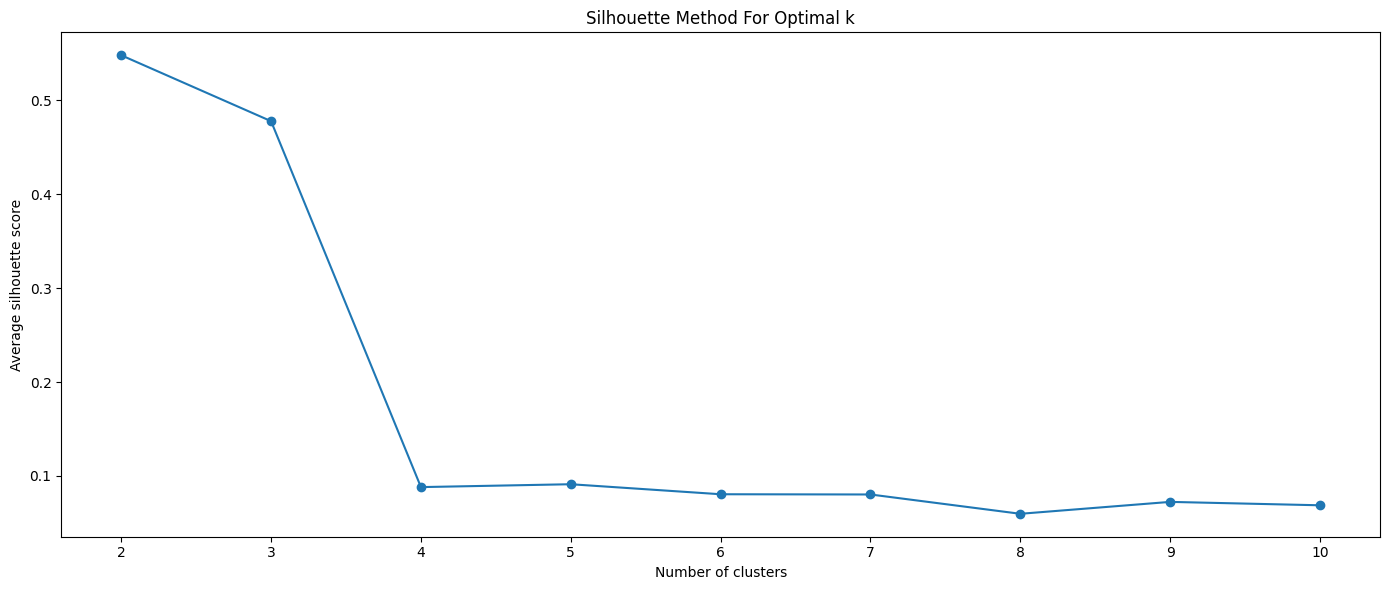

Cluster labels: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]
Cluster centers: [[ 0.01567007 -0.00199677  0.00260711 ...  0.00498255 -0.04140279
   0.00460897]
 [ 0.03246477  0.00530869 -0.01947391 ...  0.00550008 -0.03065222
  -0.00715583]]


In [150]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

def optimal_kmeans_clustering(array):
    # Convert list of vectors to a NumPy array
    # Number of samples
    X = normalize(array)
    print(X.shape)
    n_samples = X.shape[0]
    print(n_samples)
    # Determine the range of clusters to test
    if (n_samples == 1):
        return [0], X[0]

    max_clusters = min(10, n_samples - 1)
    range_n_clusters = list(range(2, max_clusters + 1))
    # Silhouette Method
    silhouette_avg = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters,init='random', random_state=0)

        kmeans.fit(X)

        cluster_labels = kmeans.labels_
        print(cluster_labels)
        silhouette_avg.append(silhouette_score(X, cluster_labels))

    # Determine the optimal number of clusters
    optimal_clusters = range_n_clusters[np.argmax(silhouette_avg)]
    print(optimal_clusters)
    # Fit KMeans with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters,init='k-means++', random_state=0)
    kmeans.fit(X)

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Plotting for visualization
    plt.figure(figsize=(14, 6))
    plt.plot(range_n_clusters, silhouette_avg, marker='o')
    plt.title('Silhouette Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Average silhouette score')

    plt.tight_layout()
    plt.show()

    return labels, centers

print(embeddings_processed.shape)
labels, centers = optimal_kmeans_clustering(embeddings_processed)
print("Cluster labels:", labels)
print("Cluster centers:", centers)

In [161]:
def euclidean_distance(x1, x2):
	return torch.sqrt(torch.sum((x1 - x2) ** 2, dim=1))



def expand_cluster(X, labels, visited, neighbors, cluster_label, eps, min_samples):
    i = 0
    while i < neighbors.shape[0]:
        neighbor_index = neighbors[i].item()
        if not visited[neighbor_index]:
            visited[neighbor_index] = True
            neighbor_neighbors = torch.nonzero(euclidean_distance(X[neighbor_index], X) < eps).squeeze()
            if neighbor_neighbors.shape[0] >= min_samples:
                neighbors = torch.cat((neighbors, neighbor_neighbors))
        if labels[neighbor_index] == 0:
            labels[neighbor_index] = cluster_label
        i += 1

def dbscan(X, eps, min_samples):

  n_samples = X.shape[0]
  labels = torch.zeros(n_samples, dtype=torch.int)

  # Initialize cluster label and visited flags
  cluster_label = 0
  visited = torch.zeros(n_samples, dtype=torch.bool)

  # Iterate over each point
  for i in range(n_samples):
      if visited[i]:
          continue
      visited[i] = True

      # Find neighbors
      neighbors = torch.nonzero(euclidean_distance(X[i], X) < eps).squeeze()

      # Handle the case when neighbors is 0-dimensional
      if neighbors.ndim == 0:
          # Label as noise
          labels[i] = 0
      elif neighbors.shape[0] < min_samples:
          # Label as noise
          labels[i] = 0
      else:
          # Expand cluster
          cluster_label += 1
          labels[i] = cluster_label
          expand_cluster(X, labels, visited, neighbors, cluster_label, eps, min_samples)

  return labels

list

In [164]:
eps = 0.3
min_samples = 1
X = torch.tensor(embeddings_processed, dtype=torch.float)
print(X)
# Perform clustering
labels = dbscan(X, eps, min_samples)
print(labels)
#https://www.geeksforgeeks.org/pytorch-for-unsupervised-clustering/#dbscan-clustering

tensor([[ 0.8278, -0.0302, -0.5217,  ...,  0.4238, -0.8175, -0.4285],
        [ 0.7921, -0.0456, -0.5895,  ...,  0.2579, -0.9475, -0.2924],
        [ 0.5464,  0.2380, -0.4345,  ...,  0.0803, -0.7465, -0.1660],
        ...,
        [ 0.9226,  0.2452, -0.4427,  ...,  0.1615, -0.6063, -0.2568],
        [ 0.4673,  0.0046, -0.3750,  ...,  0.3218, -0.7101, -0.1599],
        [ 0.8626,  0.1354, -0.0076,  ...,  0.1615, -0.7406, -0.3208]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      